In [5]:
from textblob import TextBlob
from wordcloud import WordCloud
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
import imageio
#from scipy.misc import imread
import random
import pandas as pd
import numpy as np
import re, json, datetime, pytz
import matplotlib.pyplot as plt
#from sklearn.feature_extraction import text
from nltk.stem.porter import PorterStemmer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD
from textblob import TextBlob
#from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from collections import Counter



In [6]:
from textblob import TextBlob
import re
import bleach
#from beautifulsoup4 import BeautifulSoup
#from BeautifulSoup import BeautifulSoup

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    pol = analysis.sentiment.polarity
    if pol > 0:
        return 1 , pol
    elif pol == 0:
        return 0, pol
    else:
        return -1, pol

def full_clean(text_str):
    from sklearn.feature_extraction import text
    stop_words = text.ENGLISH_STOP_WORDS
    corpus = []
    for string in text_str:
        clean_str = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", string).lower().split()
        text = [word for word in clean_str if not word in stop_words]
        text = ' '.join(text)
        corpus.append(text)
    return corpus


In [5]:
import numpy as np
import json
import re
import datetime, time
import pytz

hashtags = ['gohawks', 'gopatriots' , 'nfl', 'patriots' , 'sb49', 'superbowl']
pst_tz = pytz.timezone('America/Los_Angeles')

Z = []
Zi = [] 
regx = r'(?<![@\w])@(\w{1,25})'
for ht in hashtags:
    print(ht)
    file = open('tweets_#' + ht + '.txt', 'r', encoding="utf8")
    for tweet in file:
            li = json.loads(tweet)
            dirty = li.get('tweet').get('text')
            mentions = re.findall(regx,dirty)
            ment = ','.join(mentions)
            twe = clean_tweet(li.get('tweet').get('text'))
            sign, num = analyze_sentiment(twe)
            Zi = np.append(Zi,ht)
            Zi = np.append(Zi,twe)
            Zi = np.append(Zi,num)
            Zi = np.append(Zi,sign)
            Zi = np.append(Zi, ment)
            tweet_time = li.get('firstpost_date')
            time_pst = datetime.datetime.fromtimestamp(tweet_time, pst_tz)
            Zi = np.append(Zi, time_pst)
            Zi = np.append(Zi, li.get('author').get('name'))
            Zi = np.append(Zi, li.get('tweet').get('geo'))
            Zi = np.append(Zi, li.get('tweet').get('source'))
            Z.append(Zi)
            Zi = []
            

gohawks
gopatriots
nfl
patriots
sb49
superbowl


In [6]:
import pandas as pd
df = pd.DataFrame(Z)
df.columns = ['HashTags','Tweet', 'SentNum' , 'SentSign', 'Mentions','Time','Author','Location','Source']
df.to_pickle('tweet_df')
#df = pd.read_pickle(tweet_df)
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)
#print(df.head(1000))
print(len(df.Mentions.unique()))

188177


In [8]:
df = pd.read_pickle('tweet_df')

## 2. Draw the word cloud for top mentions (@) in all the tweets

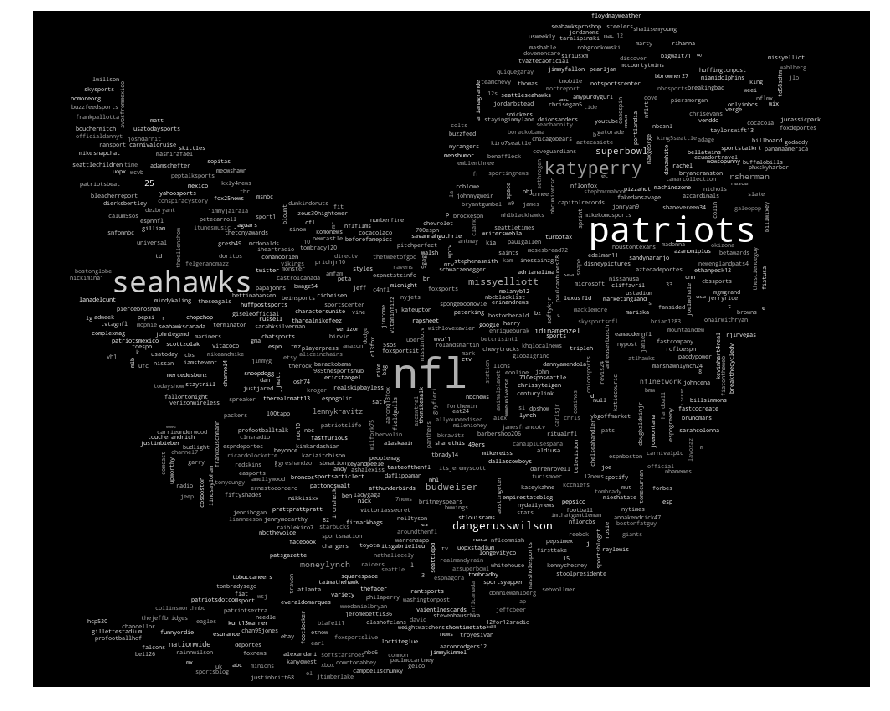

[('nfl', 548681), ('patriots', 379630), ('seahawks', 252033), ('katyperry', 46072), ('dangerusswilson', 10167), ('missyelliott', 8735), ('superbowl', 7642), ('budweiser', 7048), ('moneylynch', 6179), ('25', 5919)]


In [20]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


logomask = imageio.imread('twitter.png')
fontcolor='#fafafa'
bgcolor = '#000000'

def get_wordcloud(text):
    cleaned_text = full_clean(text)
    full_text = ' '.join(cleaned_text)
    cleaned_text = full_text.split()
    #wordcloud = WordCloud(max_font_size=40).generate(full_text)
    wordcloud = WordCloud(background_color='black',max_font_size=50,
                          mask = logomask,
                          max_words=700,
                          width=1800,
                          height=1400).generate_from_frequencies(Counter(cleaned_text))
    #plt.figure(figsize=(10,10))
    #plt.imshow(wordcloud, interpolation="bilinear")
    #plt.axis("off")
    #plt.show()
    
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
    plt.axis('off')
    plt.show()
   
    counts=Counter(cleaned_text)
    #print(counts)
    most_occur = counts.most_common(10)
    print(most_occur)

    
mentions = df['Mentions'].tolist()
get_wordcloud(mentions)

## 3.  Sentimenal Analysis of Seahawks Tweet
#### Sentimental Analysis of tweets with #gohawks
#### Sentimental Analysis of tweets with mentions of Seahwaks


C:\Users\anupams\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


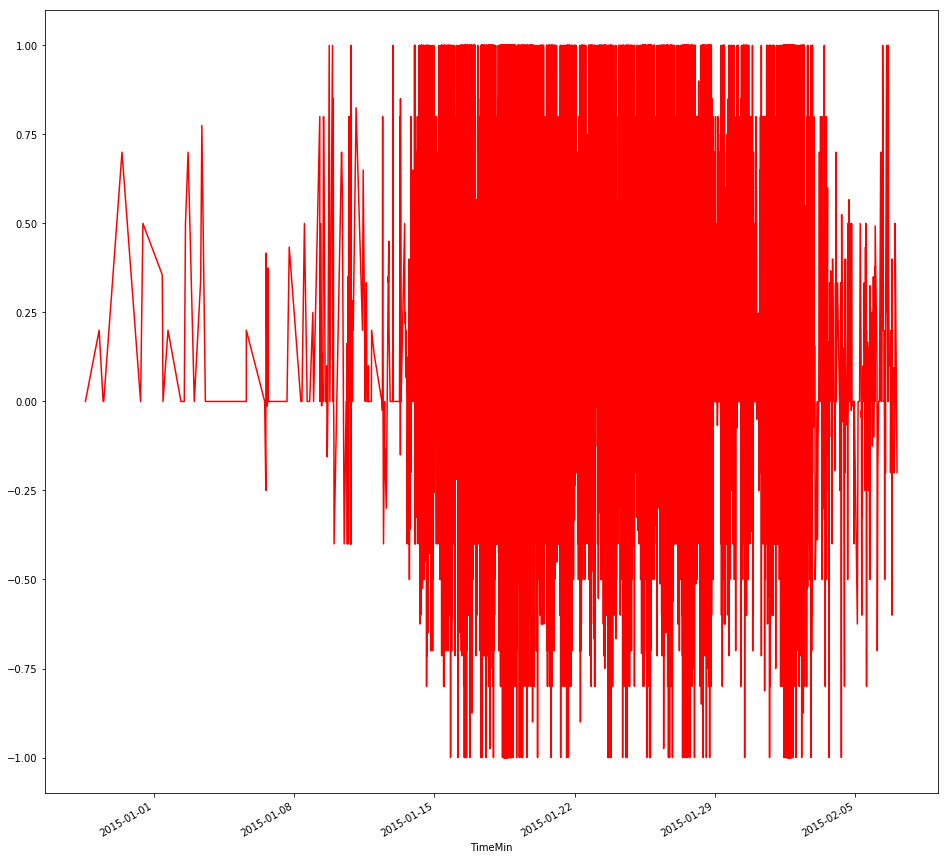

In [23]:
import datetime
df['TimeMin'] = df['Time'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,dt.minute))

## let us first look into all the tweets with go hawks
hawksdf_ht = df[df['HashTags'].isin(['gohawks'])]

hawksdf_ht['SentNum']=hawksdf_ht['SentNum'].astype(float)
#hawksdf_ht['SentSign']=hawksdf_ht['SentSign'].astype(float)
#TimeMin = df['TimeMin'].value_counts()


## let us create timeseries of the sentiment data
#tlen = pd.Series(data=hawksdf_ht['SentSign'].values, index=hawksdf_ht['TimeMin'])
tlen = pd.Series(data=hawksdf_ht['SentNum'].values, index=hawksdf_ht['TimeMin'])
# Let us plot sentiments along time:

tlen.plot(figsize=(16,16), color='r');

##Let us now look into all tweets with mention of Seahwaks.

#hawksdf_men = df[df['Mentions'].isin(['Seahawks','seahawks','Seahawks,NFL','Seahawks,DangeRussWilson','DangeRussWilson,Seahawks','Seahawks,nfl','Seahawks,12s','12s,Seahawks'])]



C:\Users\anupams\AppData\Local\Continuum\miniconda3\envs\myenv\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


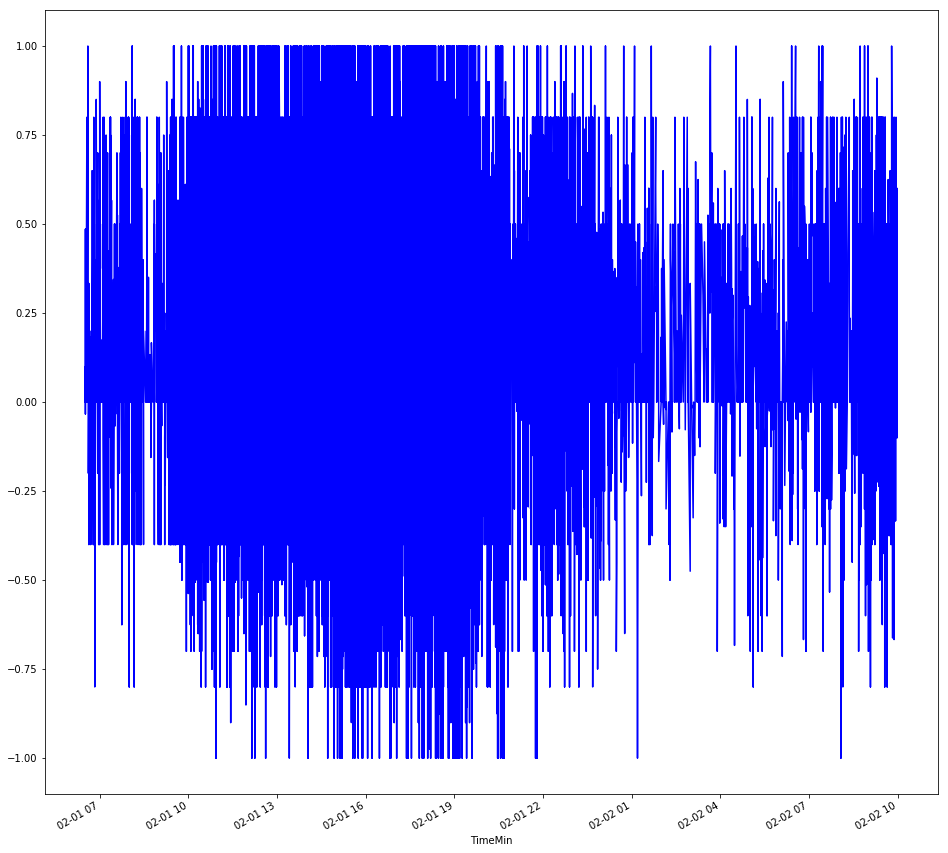

In [31]:
Limdf_SH= hawksdf_ht[(hawksdf_ht['TimeMin'] > '2015-02-01 06:30:00') & (hawksdf_ht['TimeMin'] < '2015-02-02 10:00:00')]

Limdf_SH['SentNum']=Limdf_SH['SentNum'].astype(float)
#TimeMin = df['TimeMin'].value_counts()


## let us create timeseries of the sentiment data
tlen2 = pd.Series(data=Limdf_SH['SentNum'].values, index=Limdf_SH['TimeMin'])
# Let us plot sentiments along time:

tlen2.plot(figsize=(16,16), color='b');


## Sentimental Analysis on Patriots Tweet (GoPatriots and Patriots hashtags)

C:\Users\anupams\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


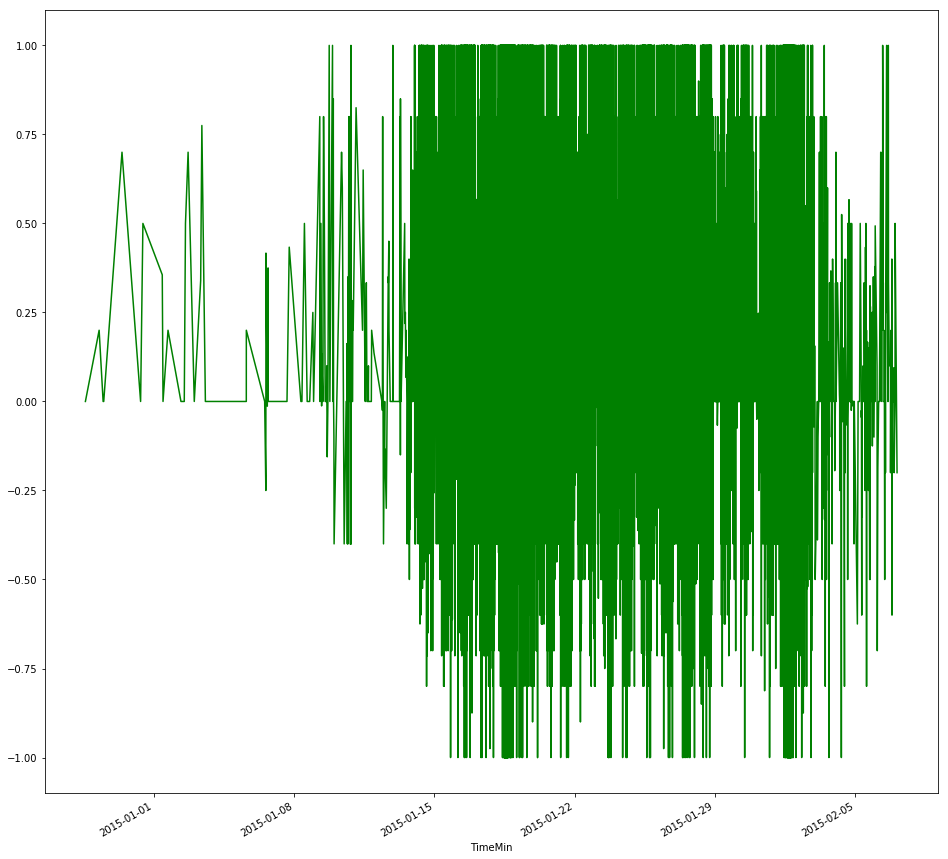

In [25]:
import datetime
df['TimeMin'] = df['Time'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,dt.minute))

## let us first look into all the tweets with go hawks
patsdf_ht = df[df['HashTags'].isin(['gopatriots','patriots'])]

patsdf_ht['SentNum']=patsdf_ht['SentNum'].astype(float)
#TimeMin = df['TimeMin'].value_counts()


## let us create timeseries of the sentiment data
tlen3 = pd.Series(data=patsdf_ht['SentNum'].values, index=patsdf_ht['TimeMin'])
# Let us plot sentiments along time:

tlen.plot(figsize=(16,16), color='g');




## Sentimental Analysis for both Seahawks and Patriots tweets

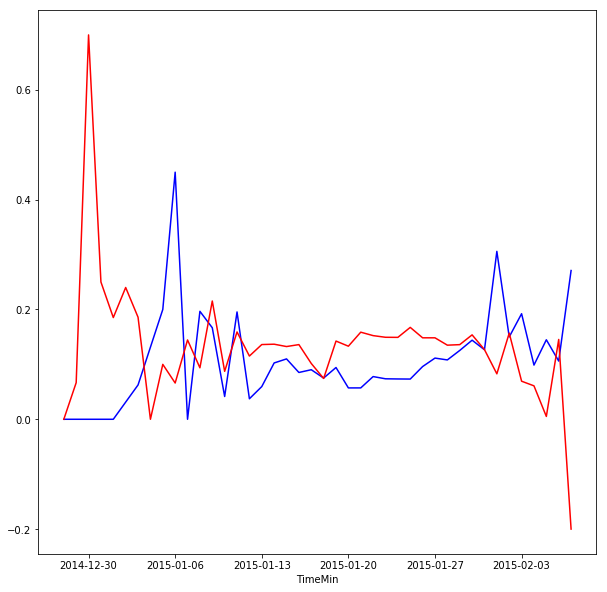

In [74]:
#Limdf_PT= patsdf_ht[(patsdf_ht['TimeMin'] > '2015-02-01 06:30:00') & (patsdf_ht['TimeMin'] < '2015-02-02 10:00:00')]

## Let us plot #patriots & #gopatriots sentiments
times = pd.to_datetime(patsdf_ht.TimeMin)
grouped = patsdf_ht.groupby([times.dt.date]).SentNum.mean()
## let us create timeseries of the sentiment data
tlen6 = pd.Series(data=list(grouped), index=grouped.keys())
tlen6.plot(figsize=(10,10), color='b');

## Let us plot gohawks sentiments
times = pd.to_datetime(hawksdf_ht.TimeMin)
grouped2 = hawksdf_ht.groupby([times.dt.date]).SentNum.mean()
tlen7 = pd.Series(data=list(grouped2), index=grouped2.keys())
tlen7.plot(figsize=(10,10), color='r');




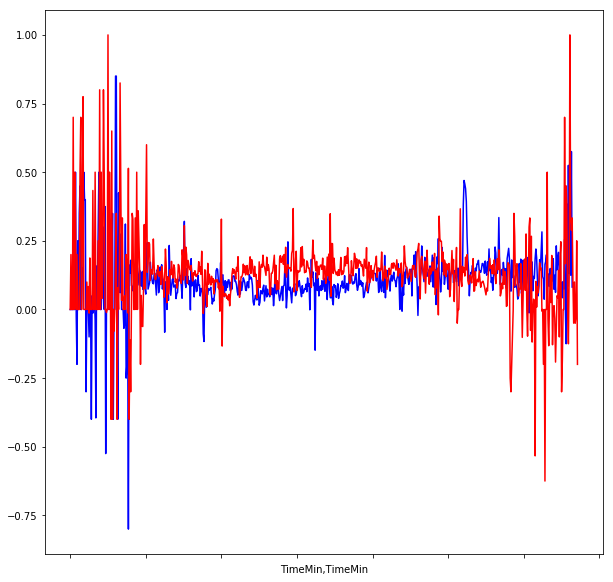

In [90]:
## plot for each hour
times = pd.to_datetime(patsdf_ht.TimeMin)
grouped = patsdf_ht.groupby([times.dt.date, times.dt.hour]).SentNum.mean()
## let us create timeseries of the sentiment data
tlen6 = pd.Series(data=list(grouped), index=grouped.keys())
tlen6.plot(figsize=(10,10), color='b');

## Let us plot gohawks sentiments
times = pd.to_datetime(hawksdf_ht.TimeMin)
grouped2 = hawksdf_ht.groupby([times.dt.date,times.dt.hour]).SentNum.mean()
tlen7 = pd.Series(data=list(grouped2), index=grouped2.keys())
tlen7.plot(figsize=(10,10), color='r');


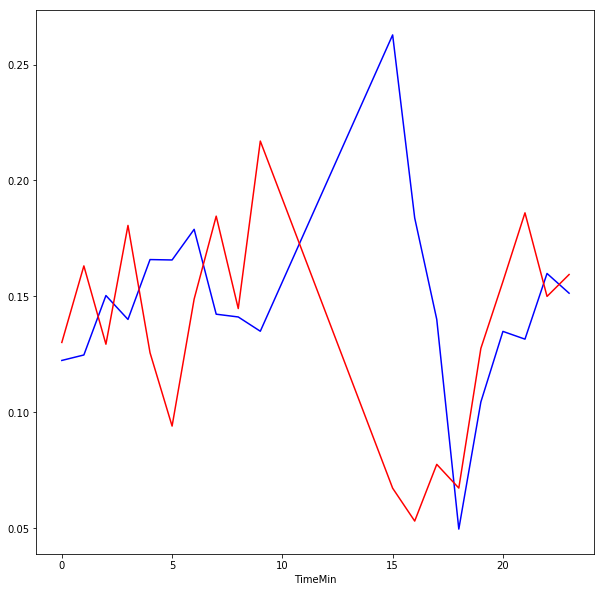

In [75]:
## Let us plot #patriots & #gopatriots sentiments by hour during the game
Limdf_PT= patsdf_ht[(patsdf_ht['TimeMin'] > '2015-02-01 15:00:00') & (patsdf_ht['TimeMin'] < '2015-02-02 10:00:00')]
Limdf_SH= hawksdf_ht[(hawksdf_ht['TimeMin'] > '2015-02-01 15:00:00') & (hawksdf_ht['TimeMin'] < '2015-02-02 10:00:00')]

times = pd.to_datetime(Limdf_PT.TimeMin)
grouped = Limdf_PT.groupby([times.dt.hour]).SentNum.mean()
## let us create timeseries of the sentiment data
tlen6 = pd.Series(data=list(grouped), index=grouped.keys())
tlen6.plot(figsize=(10,10), color='b');

## Let us plot gohawks sentiments
times = pd.to_datetime(Limdf_SH.TimeMin)
grouped2 = Limdf_SH.groupby([times.dt.hour]).SentNum.mean()
tlen7 = pd.Series(data=list(grouped2), index=grouped2.keys())
tlen7.plot(figsize=(10,10), color='r');


In [14]:
print(len(hawksdf_ht))
print(hawksdf_ht.HashTags.unique())
print(len(hawksdf_men))
print(hawksdf_men.HashTags.unique())

169122
['gohawks']
219514
['gohawks' 'gopatriots' 'nfl' 'patriots' 'sb49' 'superbowl']


In [16]:
import datetime
df['TimeMin'] = df['Time'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,dt.minute))

## Sentiments Analysis of Brand 
##### Budweiser
##### Nationwide
##### eBay
##### McDonalds
##### Microsoft
##### tmobile
##### Skittles


C:\Users\anupams\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\anupams\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Total Number of times Budweiser was mentioned 2848
Percentage of Positive Budweiser mentions 57.549157303370784
Percentage of Negative Budweiser mentions 11.551966292134832
Percentage of Neutral Budweiser mentions 30.89887640449438
Total Number of times Nationwide was mentioned 2585
Percentage of Positive Nationwide mentions 32.95938104448743
Percentage of Negative Nationwide mentions 38.91682785299807
Percentage of Neutral Nationwide mentions 28.123791102514506


C:\Users\anupams\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\anupams\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Total Number of times Microsoft was mentioned 816
Percentage of Positive Microsoft mentions 61.76470588235294
Percentage of Negative Microsoft mentions 5.759803921568627
Percentage of Neutral Microsoft mentions 32.47549019607843
Total Number of times Always was mentioned 52
Percentage of Positive Always mentions 73.07692307692308
Percentage of Negative Always mentions 3.8461538461538463
Percentage of Neutral Always mentions 23.076923076923077


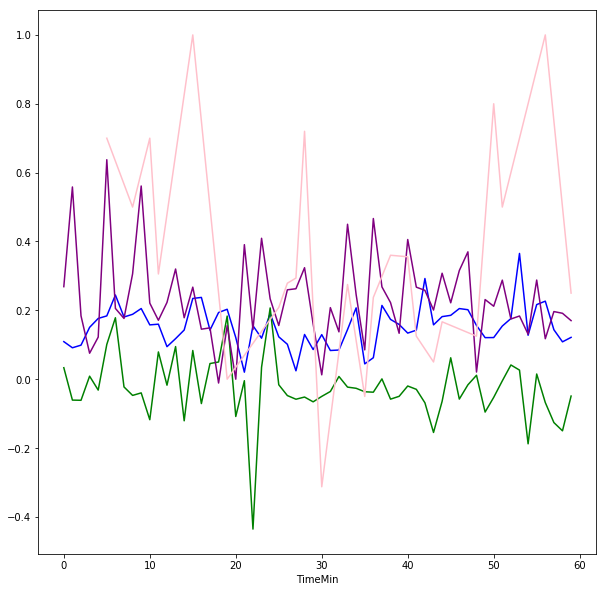

In [73]:
Limdf= df[(df['TimeMin'] > '2015-02-01 05:30:00') & (df['TimeMin'] < '2015-02-02 13:00:00')]

ad_df = Limdf[Limdf['Mentions'].isin(['Budweiser'])]
times = pd.to_datetime(ad_df.TimeMin)
ad_df['SentNum']=ad_df['SentNum'].astype(float)
grouped = ad_df.groupby([times.dt.minute]).SentNum.mean()
tot = len(ad_df)
pos = len(ad_df[(ad_df['SentNum']>0)])
neg = len(ad_df[(ad_df['SentNum']<0)])
neu = len(ad_df[(ad_df['SentNum']==0)])
print("Total Number of times Budweiser was mentioned", tot)
print("Percentage of Positive Budweiser mentions", (pos*100)/tot)
print("Percentage of Negative Budweiser mentions", (neg*100)/tot)
print("Percentage of Neutral Budweiser mentions", (neu*100)/tot)
## let us create timeseries of the sentiment data
tlen6 = pd.Series(data=list(grouped), index=grouped.keys())
tlen6.plot(figsize=(10,10), color='blue');

ad_df = Limdf[Limdf['Mentions'].isin(['Nationwide'])]
times = pd.to_datetime(ad_df.TimeMin)
ad_df['SentNum']=ad_df['SentNum'].astype(float)
grouped = ad_df.groupby([times.dt.minute]).SentNum.mean()
tot = len(ad_df)
pos = len(ad_df[(ad_df['SentNum']>0)])
neg = len(ad_df[(ad_df['SentNum']<0)])
neu = len(ad_df[(ad_df['SentNum']==0)])
print("Total Number of times Nationwide was mentioned", tot)
print("Percentage of Positive Nationwide mentions", (pos*100)/tot)
print("Percentage of Negative Nationwide mentions", (neg*100)/tot)
print("Percentage of Neutral Nationwide mentions", (neu*100)/tot)
## let us create timeseries of the sentiment data
tlen6 = pd.Series(data=list(grouped), index=grouped.keys())
tlen6.plot(figsize=(10,10), color='green');


ad_df = Limdf[Limdf['Mentions'].isin(['Microsoft'])]
times = pd.to_datetime(ad_df.TimeMin)
ad_df['SentNum']=ad_df['SentNum'].astype(float)
grouped = ad_df.groupby([times.dt.minute]).SentNum.mean()
tot = len(ad_df)
pos = len(ad_df[(ad_df['SentNum']>0)])
neg = len(ad_df[(ad_df['SentNum']<0)])
neu = len(ad_df[(ad_df['SentNum']==0)])
print("Total Number of times Microsoft was mentioned", tot)
print("Percentage of Positive Microsoft mentions", (pos*100)/tot)
print("Percentage of Negative Microsoft mentions", (neg*100)/tot)
print("Percentage of Neutral Microsoft mentions", (neu*100)/tot)
## let us create timeseries of the sentiment data
tlen6 = pd.Series(data=list(grouped), index=grouped.keys())
tlen6.plot(figsize=(10,10), color='purple');


ad_df = Limdf[Limdf['Mentions'].isin(['always'])]
times = pd.to_datetime(ad_df.TimeMin)
ad_df['SentNum']=ad_df['SentNum'].astype(float)
grouped = ad_df.groupby([times.dt.minute]).SentNum.mean()
tot = len(ad_df)
pos = len(ad_df[(ad_df['SentNum']>0)])
neg = len(ad_df[(ad_df['SentNum']<0)])
neu = len(ad_df[(ad_df['SentNum']==0)])
print("Total Number of times Always was mentioned", tot)
print("Percentage of Positive Always mentions", (pos*100)/tot)
print("Percentage of Negative Always mentions", (neg*100)/tot)
print("Percentage of Neutral Always mentions", (neu*100)/tot)
## let us create timeseries of the sentiment data
tlen6 = pd.Series(data=list(grouped), index=grouped.keys())
tlen6.plot(figsize=(10,10), color='pink');